# Homework 1

In [1]:
import networkx as nx
import numpy as np
np.random.seed(42)
import timeit
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import fnss
from tqdm import tqdm

## Connectivity

### 1.1

To build both the Erdos Renyi and the R Regular random graph, we will use pre-implemented function of the *Networkx* library

In [12]:
# Function to define the graph that we will use
def Erdos_Renyi(K, p): 
    # Erdos Renyi graph
    return nx.binomial_graph(n=K, p=p)

def r_regular(K, d):
    # r regular random graph
    return nx.random_regular_graph(d=d, n=K)

## 1.2

There are different ways to check whether or not a graph is connected, some of the implementations comprehend:
- The use of the *BFS algorithm*.
- Computing the eigenvalues of *Adjacency matrix's Laplacian*.
- Checking for the *Irreducibility of the Adjacency matrix*.

In [8]:
# Function that checks whether or not a graph is connected using the BFS algorithm
def BFS(Graph):
    # Take the first node as root
    root = list(Graph.nodes)[0]
    # Initialize the lists for the queue and the visited nodes
    queue = []
    visited = []
    # Insert the root in the lists
    queue.append(root)
    visited.append(root)
    # For all the elements in the queue
    while queue:
        # Take the first element
        s = queue.pop(0)
        # For all it's neighbors
        for i in Graph.neighbors(s):
            # If I have not visited the neighbor yet
            if i not in visited:
                # I add it to the lists
                queue.append(i)
                visited.append(i)

    # The graph will be connected if all the nodes of the graph were visited
    return len(visited) == len(Graph.nodes)


In [5]:
# Function that checks whether or not a graph is connected by verifying that the adjacency matrix is irreducible
def Irreducibility(Graph):
    # Extract the matrix
    Adj = nx.to_numpy_array(Graph)
    n = Adj.shape[0]

    # Define the matrices where there will be stored 
    # The sum of the power of Adj
    s = np.zeros(Adj.shape)
    # The matrix Adj's power 
    prod = np.eye(Adj.shape[0])

    for _ in range(n):
        s = np.add(s, prod)
        prod = np.dot(Adj, prod)

    # Extract the precision of the machine
    epsd = np.finfo(np.float64).eps

    # The graph will be connected if all the elements of the matrix s are over 0
    return np.all(np.around(s, 14) > epsd)


In [6]:
# Function that checks whether or not a graph is connected by by looking at the eigenvalues of the adjacency matrix's Laplacian
def Laplacian(Graph):
    # Extract the adjacency matrix
    Adj = nx.to_numpy_array(Graph)
    # Create a diagonal matrix with values equal to the nodes' degree
    D = np.diag(np.sum(Adj, axis = 1))
    # Define the laplacian
    L = D - Adj

    # Extract the eigenvalues and eigenvectors 
    w, v = np.linalg.eig(L)

    # Extract the precision of the machine
    epsd = np.finfo(np.float64).eps

    # The graph will be connected if there is only one eigenvalue equal to 0
    return sum(np.around(w, 14) <= epsd) == 1

### 1.3

Since there are many possible methods to check for the connectivity of the graph, a way to find out which is the best is to compute the time complexity by comparing the time each take to do the job.

In [ ]:
# Initialize the lists where we will store the times
t_Laplacian = []
t_Irreducibility = []
t_BFS5 = []
t_BFS2 = []

# Run and save the times for all three methods and for number of nodes that goes up to K = 1000 
for K in range(2, 1000):
    # Create the graph
    g = Erdos_Renyi(K, 0.5)
    g1 = Erdos_Renyi(K, 0.2)

    # Compute and save the times
    start = timeit.default_timer()
    Laplacian(g)
    t_Laplacian.append(timeit.default_timer()-start)

    start = timeit.default_timer()
    Irreducibility(g)
    t_Irreducibility.append(timeit.default_timer()-start)

    start = timeit.default_timer()
    BFS(g)
    t_BFS5.append(timeit.default_timer()-start)

    start = timeit.default_timer()
    BFS(g1)
    t_BFS2.append(timeit.default_timer()-start)

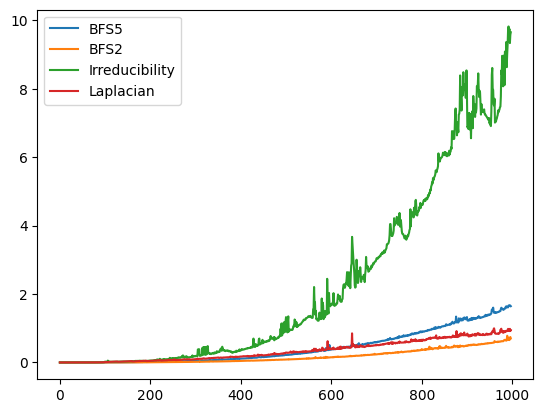

In [8]:
# Show the results
plt.plot(t_BFS5)
plt.plot(t_BFS2)
plt.plot(t_Irreducibility)
plt.plot(t_Laplacian)
plt.legend(['BFS5','BFS2', 'Irreducibility', 'Laplacian'])
plt.show()

### 1.4

It's clear from the plot above that the best algorithms are either the *BFS* or the *Laplacian*.
For this reason we will now use one of those, the *BFS*, to try and study the probabilities of the *Erdos Renyi* graph, before, and *R Regualar Random*, after, to be connected, given different setups. 

##### Erdos Renyi
What's the probability of an *Erdos Renyi* graph, with $K=100$ and $p\in[0,1]$ to be connected?

In [9]:
# Function to run a simulation that, given p and K = 100 for the Erdos_Renyi graph, returns the probability of the graph to be connected
def ER_simulation(p):
    # Simulation size
    M = 500
    results = []

    for _ in range(M):
        # Create the graph
        g = Erdos_Renyi(100, p)
        # Store in the list whether or not the graph was connected
        results.append(BFS(g))

    # Return the ratio: number connected graphs over number of graphs created 
    return sum(results)/M

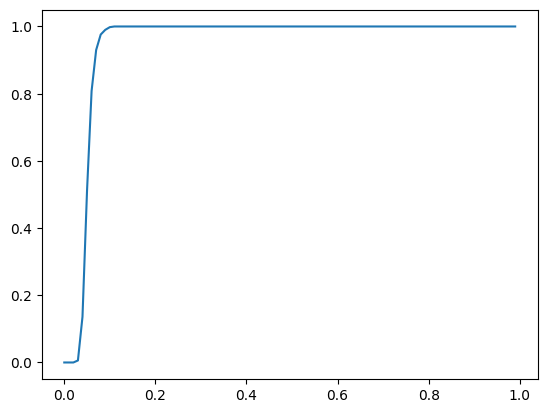

In [10]:
# Iterate the simulation over different values of p
prob = []
for i in np.arange(0, 1, 0.01):
    prob.append(ER_simulation(i))
    
# Plot the result
plt.plot(np.arange(0, 1, 0.01), prob)
plt.show()

##### R Regular Random
What's the probability of an *R Regular Random* graph, with $K=100$ and $r\in\{2,8\}$ to be connected?

In [11]:
# Function to run a simulation that, given K and r = 2 or 8 for the R-Regular random graph, returns the probability of the graph to be connected

# r = 2
def R2_simulation(K):
    # Simulation size
    M = 500
    results = []
    
    for _ in range(M):
        # Create the graph
        g = r_regular(K, 2)
        # Store in the list whether or not the graph was connected
        results.append(BFS(g))

    # Return the ratio: number connected graphs over number of graphs created 
    return float(sum(results))/M

# r = 8
def R8_simulation(K):
    M = 500
    results = []

    for _ in range(M):
        # Create the graph
        g = r_regular(K, 8)
        # Store in the list whether or not the graph was connected
        results.append(BFS(g))

    # Return the ratio: number connected graphs over number of graphs created 
    return float(sum(results))/M

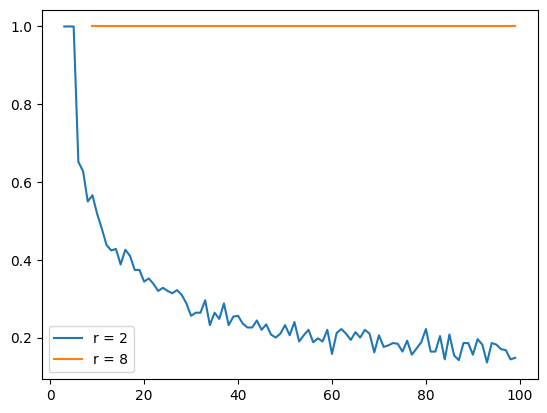

In [280]:
# Iterate both simulations over the different values of K
prob_2 = []
for k in np.arange(3, 100):
    prob_2.append(R2_simulation(k))

prob_8 = []
for k in np.arange(9, 100):
    prob_8.append(R8_simulation(k))

# And plot together the results 
plt.plot(np.arange(3, 100), prob_2)
plt.plot(np.arange(9, 100), prob_8)
plt.legend(['r = 2', 'r = 8'])
plt.show()

## 2 Data Centers

### 2.2

Out of all the possible topologies for Data Centers, we can recognize two of them:
- The Fat-Tree topology, that we will compute using a pre-implemented function coming from the *fnss* library
- The Jellyfish topology, that we will compute first by using the *R Regular Random* form *Networkx*, to create the graph of the switches, then by manually adding all the needed nodes for the servers.

In [3]:
# Function to create a graph for the jellyfish topology
def create_jelly(N, K):
    # Create the graph with the switches
    while True:
        Graph = r_regular(N, int(K/2))
        # It has to be connected
        if BFS(Graph):
            break

    # Set the type of node for the switches
    type = {}
    for node in Graph.nodes():
        type[node] = 'switch'
    nx.set_node_attributes(Graph, type, 'type')

    Switches = list(Graph.nodes())
    count = len(Switches)
    
    # Create the servers/hosts' nodes
    for node in Switches:
        # For each of the switches we have to add K/2 servers
        for _ in range(int(K/2)):
            Graph.add_edge(node,count)
            nx.set_node_attributes(Graph, {count: 'host'}, 'type')
            count+=1

    # Return the graph
    return Graph

Since we want to compare the two topologies by using the *mean response time*, we need two different functions to compute the *number of hops* and the *response time R*.

Remember given the number of servers to use N, the response time is equal to:
$$ R = \max_{i\in {1,...,N}} T_0 + X_i +\frac{(\frac{L_f}{N}+L_{o,i})(1 + f)}{TH_i} $$

Where:
- $T_0 = 30\ sec$ is a fixed quantity that a server needs to do the set up.
- $X$ is the time needed for a server to complete the job locally, $E[X]=8\ h = 28800\ s $
- $X_i \sim Exp(\lambda = \frac{E[X]}{N})$, a random variable that represent the time a machine takes to complete a part of the task.
- $L_f = 4\ TB = 4000\ GB$ is the amount of data give to the main server. This quantity will be diveded between the other $N$ servers, that will in this way receive $\frac{L_f}{N} GB$ of data.  
- $L_o = 4\ TB = 4000\ GB$ is the amount of data that has to be given as an out put, so each of the $N$ working machines will need to give back a quantity $L_{o,i} \sim Unif(0,\frac{2L_o}{N})$.
- $TH_i$ the throughput that can be computed as: $\theta_i = C\frac{\frac{1}{T_i}}{\sum_{j=1}^N\frac{1}{T_j}}$, where $C = 10 Gbit/s = 1.5 GB/s$,  $\ T_i = 2\tau h_i$ and $h_i = number\ of\ edges\ to\ go\ from\ the\ main\ server\ to\ server\ i$.
- $f = \frac{48}{1500}$ is an overhead that has to be added on top of the transered data.

 

In [4]:
# Function that find the distance of the servers form the source (in steps) using the BFS algorithm
def BFS_hops(Graph, servers):
    # Take a random server as root
    root = np.random.choice(list(servers),1)[0]

    # Initialize the lists for the queue, visited servers and the number of hops needed to get from the root to the given server 
    queue = []
    visited = []
    hops = {root: 0}

    # Insert the root in the lists
    queue.append(root)
    visited.append(root)

    # For all the elements in the queue
    while queue:
        # Take the first element
        s = queue.pop(0)
        # For all it's neighbors
        for i in Graph.neighbors(s):
            # If I have not visited the neighbor yet
            if i not in visited:
                # I add it to the lists
                queue.append(i)
                visited.append(i)
                # And indentify the number of hops
                hops[i] = hops[s] + 1

    # Return the hops dict only for the nodes that are servers
    return dict([x for x in hops.items() if x[0] in servers])

In [5]:
# R=max_i {T_0 + X_i + (L_f/N+Lo,i)(1+f)/theta_i}

def Response_time(N, hops):
    wanted_servers = dict([x for x in hops.items()][1:N+1])
    RTT_inv = dict([(s,1/(2*tau*h)) for s,h in wanted_servers.items()])
    den = sum([x[1] for x in RTT_inv.items()])
    R_i = []
    for s,h in wanted_servers.items():
        X_i = np.random.exponential(Exp/N)
        L_oi = np.random.uniform(0,2*L_0/N)
        TH_i = C*RTT_inv[s]/den
        data = ((L_f/N)+L_oi)*(1+f)/TH_i
        R_i.append(t_0 + X_i + data)
        
    return np.max(R_i)

In [6]:
# Define all our variables
t_0 = 30
L_f = 4000
L_0 = 4000
Exp = 28800
f = 48./1500
C = 1.25
tau = 0.000005
R_base = 28830

In [9]:
# Define the fat tree graph
FT = fnss.fat_tree_topology(64)
# Select the nodes that represent serves
servers = [x for x, v in nx.get_node_attributes(FT, 'type').items() if v == 'host']
hops = BFS_hops(FT, servers)

# Create the jellyfish topology, 2048 is the numeber of switches needed to have the same number of servers as the Fat-Tree
jelly = create_jelly(2048,64)
# Select the nodes that are servers
servers = [x for x, v in nx.get_node_attributes(jelly, 'type').items() if v == 'host']
# Choose a random server as root and compute the number of hops
hops_jelly = BFS_hops(jelly, servers)

In [ ]:
# Define the list of the number of servers (from 1 to 10000) that is going to be used to compute the Respose time
N_to_check = np.linspace(1, 10000, num = 200, dtype=int)

# Compute the mean response time for all the different number of servers
Exp_R = []
for N in tqdm(N_to_check): 
    inner_time = []
    # Compute it multiple times
    for _ in range(1, 100): 
        inner_time.append(Response_time(N, hops))
    # And take the mean
    Exp_R.append(np.mean(inner_time)/R_base)

# Again compute the expected respose time, this time for the jellyfish topology
Exp_R_jelly = []
for N in tqdm(N_to_check): 
    inner_time = []
    for _ in range(1, 100): 
        inner_time.append(Response_time(N, hops_jelly))
    Exp_R_jelly.append(np.mean(inner_time)/R_base)

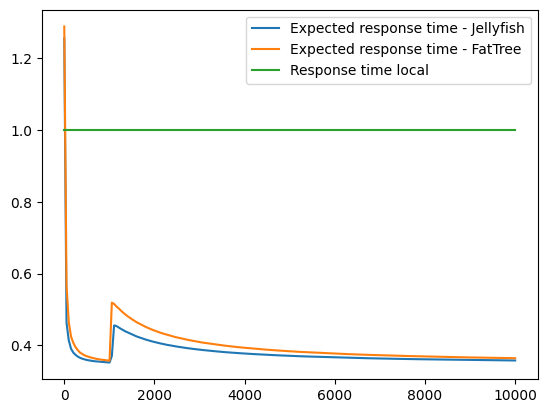

In [15]:
# Plot the result
plt.plot(N_to_check, Exp_R_jelly)
plt.plot(N_to_check, Exp_R)
plt.plot(N_to_check, np.ones(len(N_to_check)))
plt.legend(['Expected response time - Jellyfish', 'Expected response time - FatTree' ,'Response time local'])
plt.show()

We want to take a closer look where the plot seems to have a jump.

In [ ]:
N_to_check_zoom = np.linspace(1, 1100, num = 200, dtype=int)
# Compute the mean response time for all the different number of servers
Exp_R_zoom = []
for N in tqdm(N_to_check_zoom): 
    inner_time = []
    # Compute it multiple times
    for _ in range(1, 100): 
        inner_time.append(Response_time(N, hops))
    # And take the mean
    Exp_R_zoom.append(np.mean(inner_time)/R_base)

# Again compute the expected respose time
Exp_R_jelly_zoom = []
for N in tqdm(N_to_check_zoom): 
    inner_time = []
    for _ in range(1, 100): 
        inner_time.append(Response_time(N, hops_jelly))
    Exp_R_jelly_zoom.append(np.mean(inner_time)/R_base)

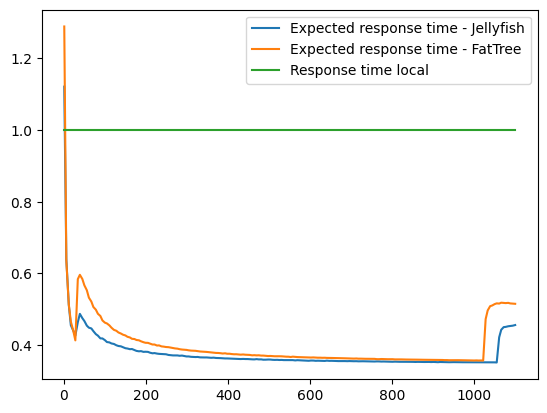

In [16]:
# Plot the results
plt.plot(N_to_check_zoom, Exp_R_jelly_zoom)
plt.plot(N_to_check_zoom, Exp_R_zoom)
plt.plot(N_to_check_zoom, np.ones(len(N_to_check)))
plt.legend(['Expected response time - Jellyfish', 'Expected response time - FatTree' ,'Response time local'])
plt.show()

The points where the jumps occur ($N = 31, N = 1024, N = 1055$) corresponds to the moments in which we start taking servers that have a higher distance from the main server.

What happens is that we are already using all the servers with distance $h_1$ form the main one, so we start working on the ones at distance $h_2$, with $h_2>h_1$.

Now for the last thing in our analysis we want to look for the points with the minimun *mean Response Time*.

From the plots we can see that the minimum seems to occur just before the second jump, so we will look for it in the range going from 1000 to 1100.

In [ ]:
N_to_check_min = np.linspace(1020, 1060, num = 40, dtype=int)

# Set the minimum to the max possible value
Min_FT = (max(Exp_R), 0)
for N in tqdm(N_to_check_min): 
    inner_time = []
    # Compute it multiple times
    for _ in range(1, 200): 
        inner_time.append(Response_time(N, hops)/R_base)
    # And check if the mean is less than the current minimum
    if(np.mean(inner_time)<=Min_FT[0]):
        Min_FT = (np.mean(inner_time),N)

# Set the minimum to the max possible value
Min_jelly = (max(Exp_R_jelly), 0)
for N in tqdm(N_to_check_min): 
    inner_time = []
    # Compute it multiple times
    for _ in range(1, 200): 
        inner_time.append(Response_time(N, hops_jelly)/R_base)
    # And check if the mean is less than the current minimum
    if(np.mean(inner_time)<=Min_jelly[0]):
        Min_jelly = (np.mean(inner_time),N)

In [65]:
print('We obtain the minimum for the Mean Response time of the Fat-Tree topology ('+ str(Min_FT[0])+
      ') for number of servers equal to:', str(Min_FT[1]))
print('We obtain the minimum for the Mean Response time of the Jellyfish topology ('+ str(Min_jelly[0])+
      ') for number of servers equal to:', str(Min_jelly[1]))

We obtain the minimum for the Mean Response time of the Fat-Tree topology (0.35686724892275523) for number of servers equal to: 1023
We obtain the minimum for the Mean Response time of the Jellyfish topology (0.35154710746660894) for number of servers equal to: 1054


## 2.3

Another way to compare the two topologies is computing their *Job Running cost*, remember that given the number of servers to use N, the Job Running cost is equal to:
$$S = E[R] + \xi E[\Theta]$$

Where $E[R]$ is the *mean response time* we just computed and $$\Theta = \sum_{i = 1}^{N} T_0 + X_i \implies E[\Theta] = E[\sum_{i = 1}^{N} (T_0 + X_i)] = \sum_{i = 1}^{N} E[T_0 + X_i] =$$ $$= \sum_{i = 1}^{N} E[T_0] + \sum_{i = 1}^{N} E[X_i] = NT_0 + N\frac{E[X]}{N} = NT_0 + E[X]$$ where, again $T_0 = 30s, E[X] = 8h = 28800s$.

Also for this new quantity we will plot the general trend, the zoomed-in plot and the minimum values. 

In [20]:
xi = 0.1
S_base = R_base*(1+xi)

# Initialize the vectors to store the job running cost
S = []
S_jelly = []
aux = []
# Compute the Job running cost given the mean response time
for i, exp in enumerate(Exp_R):
    aux.append(xi*(Exp + t_0*N_to_check[i]))
    S.append((exp*R_base + aux[i])/S_base)
    S_jelly.append((Exp_R_jelly[i]*R_base + aux[i])/S_base)

S_zoom = []
S_jelly_zoom = []
aux = []
# Compute the Job running cost for the zoomed-in plot 
for i, exp in enumerate(Exp_R_zoom):
    aux.append(xi*(Exp + t_0*N_to_check_zoom[i]))
    S_zoom.append((exp*R_base + aux[i])/S_base)
    S_jelly_zoom.append((Exp_R_jelly_zoom[i]*R_base + aux[i])/S_base)

General trend:

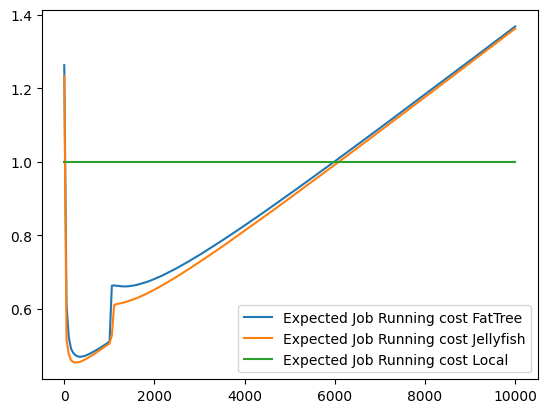

In [18]:
plt.plot(N_to_check, S)
plt.plot(N_to_check, S_jelly)
plt.plot(N_to_check, np.ones(len(N_to_check)))
plt.legend(['Expected Job Running cost FatTree','Expected Job Running cost Jellyfish', 'Expected Job Running cost Local'])
plt.show()

Zoom-in around the jumps:

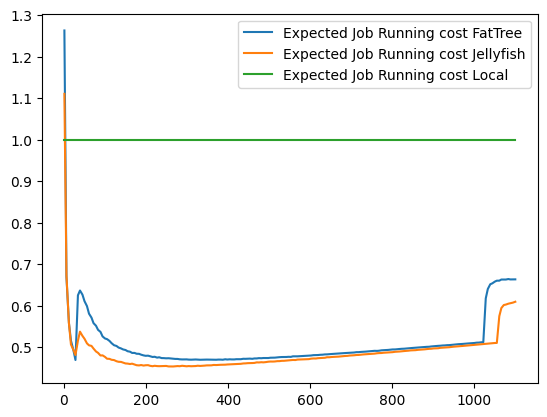

In [21]:
plt.plot(N_to_check_zoom, S_zoom)
plt.plot(N_to_check_zoom, S_jelly_zoom)
plt.plot(N_to_check_zoom, np.ones(len(N_to_check)))
plt.legend(['Expected Job Running cost FatTree','Expected Job Running cost Jellyfish', 'Expected Job Running cost Local'])
plt.show()

In this case the minimum seems to be in the first 50 values of the function for the Fat-Tree topology and between 200 and 300 for the jellyfish, so we will look for the minimum in those ranges.

In [ ]:
N_to_check_min = np.linspace(1, 50, num = 50, dtype=int)

# Set the minimum to the max possible value
Min_FT = (max(S), 0)
for N in tqdm(N_to_check_min): 
    aux = xi*(Exp + t_0*N)
    inner_time = []
    # Compute it multiple times
    for _ in range(1, 100): 
        inner_time.append(Response_time(N, hops))
    # And check if the mean is less than the current minimum
    if (np.mean(inner_time) + aux)/S_base<=Min_FT[0]:
        Min_FT = ((np.mean(inner_time) + aux)/S_base,N)

N_to_check_min = np.linspace(200, 300, num = 100, dtype=int)

# Set the minimum to the max possible value
Min_jelly = (max(S_jelly), 0)
for N in tqdm(N_to_check_min): 
    aux = xi*(Exp + t_0*N)
    inner_time = []
    # Compute it multiple times
    for _ in range(1, 100): 
        inner_time.append(Response_time(N, hops_jelly))
    # And check if the mean is less than the current minimum
    if (np.mean(inner_time) + aux)/S_base<=Min_jelly[0]:
        Min_jelly = ((np.mean(inner_time) + aux)/S_base,N)

In [28]:
print('We obtain the minimum for the Job running cost of the Fat-Tree topology ('+ str(Min_FT[0])+
      ') for number of servers equal to:', str(Min_FT[1]))
print('We obtain the minimum for the Job running cost of the Jellyfish topology ('+ str(Min_jelly[0])+
      ') for number of servers equal to:', str(Min_jelly[1]))

We obtain the minimum for the Job running cost of the Fat-Tree topology (0.4626982369489079) for number of servers equal to: 31
We obtain the minimum for the Job running cost of the Jellyfish topology (0.4527269610134606) for number of servers equal to: 272
